# Feature Ingeniering

In [1]:
import pandas as pd
import seaborn as sns

### 2. Carguemos en un pandas dataframe nuestra base de datos

In [32]:
import os
print(os.getcwd())  # Prints the current working directory
os.chdir('C:\\Users\\YULY\\Desktop\\Desktop\\PROGRAMACION ESTADISTICA\\Mineria de datos\\PROYECTO CLASIFICACION DE ESTRELLAS') 

C:\Users\YULY\Desktop\Desktop\PROGRAMACION ESTADISTICA\Mineria de datos\PROYECTO CLASIFICACION DE ESTRELLAS


In [33]:
estrellas = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')
type(estrellas) 

pandas.core.frame.DataFrame

In [45]:
url = 'https://raw.githubusercontent.com/joaramirezcu/Mineria_Proyecto/master/Skyserver_SQL2_27_2018%206_51_39%20PM.csv'
data_f1 = pd.read_csv(url, error_bad_lines=False)

In [46]:
data_f1=data_f1.drop(['rerun'], axis=1)
data_f1.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [47]:
display(data_f1.shape)

(10000, 17)

Aqui podemos establecer que los **labels** están determinados por la variables:

In [48]:
data_f1.columns                     #visualiza las columnas del DataFrame

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

El **target** es la variable **class**, la cual es de tipo categorica y tiene como niveles:

In [49]:
label = data_f1['class']   #Accediendo a una columna
label.head()

0      STAR
1      STAR
2    GALAXY
3      STAR
4      STAR
Name: class, dtype: object

Con el fin de organizar nuestros datos establecemos que:

In [50]:
data_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   camcol     10000 non-null  int64  
 10  field      10000 non-null  int64  
 11  specobjid  10000 non-null  float64
 12  class      10000 non-null  object 
 13  redshift   10000 non-null  float64
 14  plate      10000 non-null  int64  
 15  mjd        10000 non-null  int64  
 16  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(6), object(1)
memory usage: 1.3+ MB


In [51]:
# Estadísticas de las columnas númericas
data_f1.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


### Extrayendo labels numericas

In [52]:
num = (data_f1.dtypes == 'float') | (data_f1.dtypes == 'int64')
num

objid         True
ra            True
dec           True
u             True
g             True
r             True
i             True
z             True
run           True
camcol        True
field         True
specobjid     True
class        False
redshift      True
plate         True
mjd           True
fiberid       True
dtype: bool

In [53]:
num_cols = []
for c in num.index:
    if num[c] == True:
        num_cols.append(c)                #.append  agrega un ítem al final de la lista, en este caso agrega c a num_cols
        
display(num_cols)

['objid',
 'ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'camcol',
 'field',
 'specobjid',
 'redshift',
 'plate',
 'mjd',
 'fiberid']

In [54]:
data_f1_num = data_f1[num_cols]               #genera busqueda de 
data_f1_num.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512


In [55]:
# Estadísticas de las columnas númericas
data_f1_num.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,10000.0,1.237650e+18,0.000000e+00,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18
ra,10000.0,1.755300e+02,4.778344e+01,8.235100e+00,1.573709e+02,1.803945e+02,2.015473e+02,2.608844e+02
dec,10000.0,1.483615e+01,2.521221e+01,-5.382632e+00,-5.390350e-01,4.041660e-01,3.564940e+01,6.854227e+01
u,10000.0,1.861936e+01,8.286560e-01,1.298897e+01,1.817804e+01,1.885309e+01,1.925923e+01,1.959990e+01
g,10000.0,1.737193e+01,9.454572e-01,1.279955e+01,1.681510e+01,1.749513e+01,1.801015e+01,1.991897e+01
r,10000.0,1.684096e+01,1.067764e+00,1.243160e+01,1.617333e+01,1.685877e+01,1.751268e+01,2.480204e+01
i,10000.0,1.658358e+01,1.141805e+00,1.194721e+01,1.585370e+01,1.655499e+01,1.725855e+01,2.817963e+01
z,10000.0,1.642283e+01,1.203188e+00,1.161041e+01,1.561829e+01,1.638995e+01,1.714145e+01,2.283306e+01
run,10000.0,9.810348e+02,2.733050e+02,3.080000e+02,7.520000e+02,7.560000e+02,1.331000e+03,1.412000e+03
camcol,10000.0,3.648700e+00,1.666183e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00


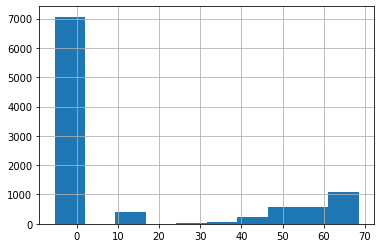

In [56]:
import matplotlib.pyplot as plt 
data_f1_num['dec'].hist()

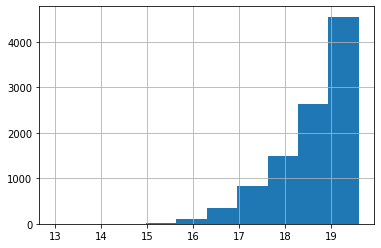

In [57]:
data_f1_num['u'].hist()

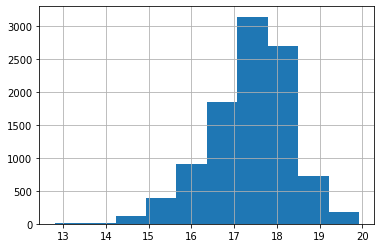

In [58]:
data_f1_num['g'].hist()

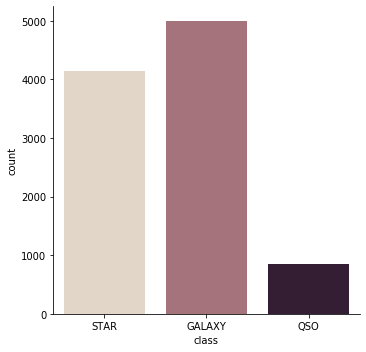

In [59]:
sns.catplot(x="class", kind="count", palette="ch:.25", data=data_f1);

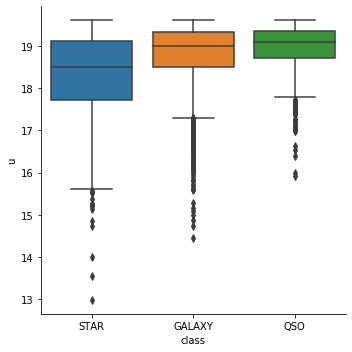

In [60]:
sns.catplot(x="class", y="u", kind="box", data=data_f1);

### Función lapply

La función lapply permite de alguna manera idnetificar los datos nulos del DataFrame

In [61]:
data_f1_num.notnull().apply(pd.Series.value_counts) 

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
True,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


Se puede observar que ninguna label presenta datos faltantes, ahora bien miremos si hay valores 0:

In [62]:
(data_f1 != 0).apply(pd.Series.value_counts)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN
True,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,9981,10000.0,10000.0,10000.0


En lo que corresponde a valores nulos es decir 0, se tiene quer en la variable *redshift* existen 19 ceros, quizas este puede ser un problema en el momento de generar el modelo.

---

Miremos que variables son las mas importantes

In [63]:
print(type(label))
print(type(data_f1_num))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [72]:
z=pd.concat([data_f1_num,label],axis=1)            #concatenando vas features con la variable respuesta.
z.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491,STAR
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541,STAR
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513,GALAXY
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510,STAR
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512,STAR


In [80]:
zz=pd.get_dummies(z["class"])
z["class"].head()

0      STAR
1      STAR
2    GALAXY
3      STAR
4      STAR
Name: class, dtype: object

In [ ]:
sns.pairplot(z)

In [ ]:
data_f1_num.iloc[0:5:, 0:5]
display(type(data_f1_num))

C:\Users\YULY\anaconda\envs\t2\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


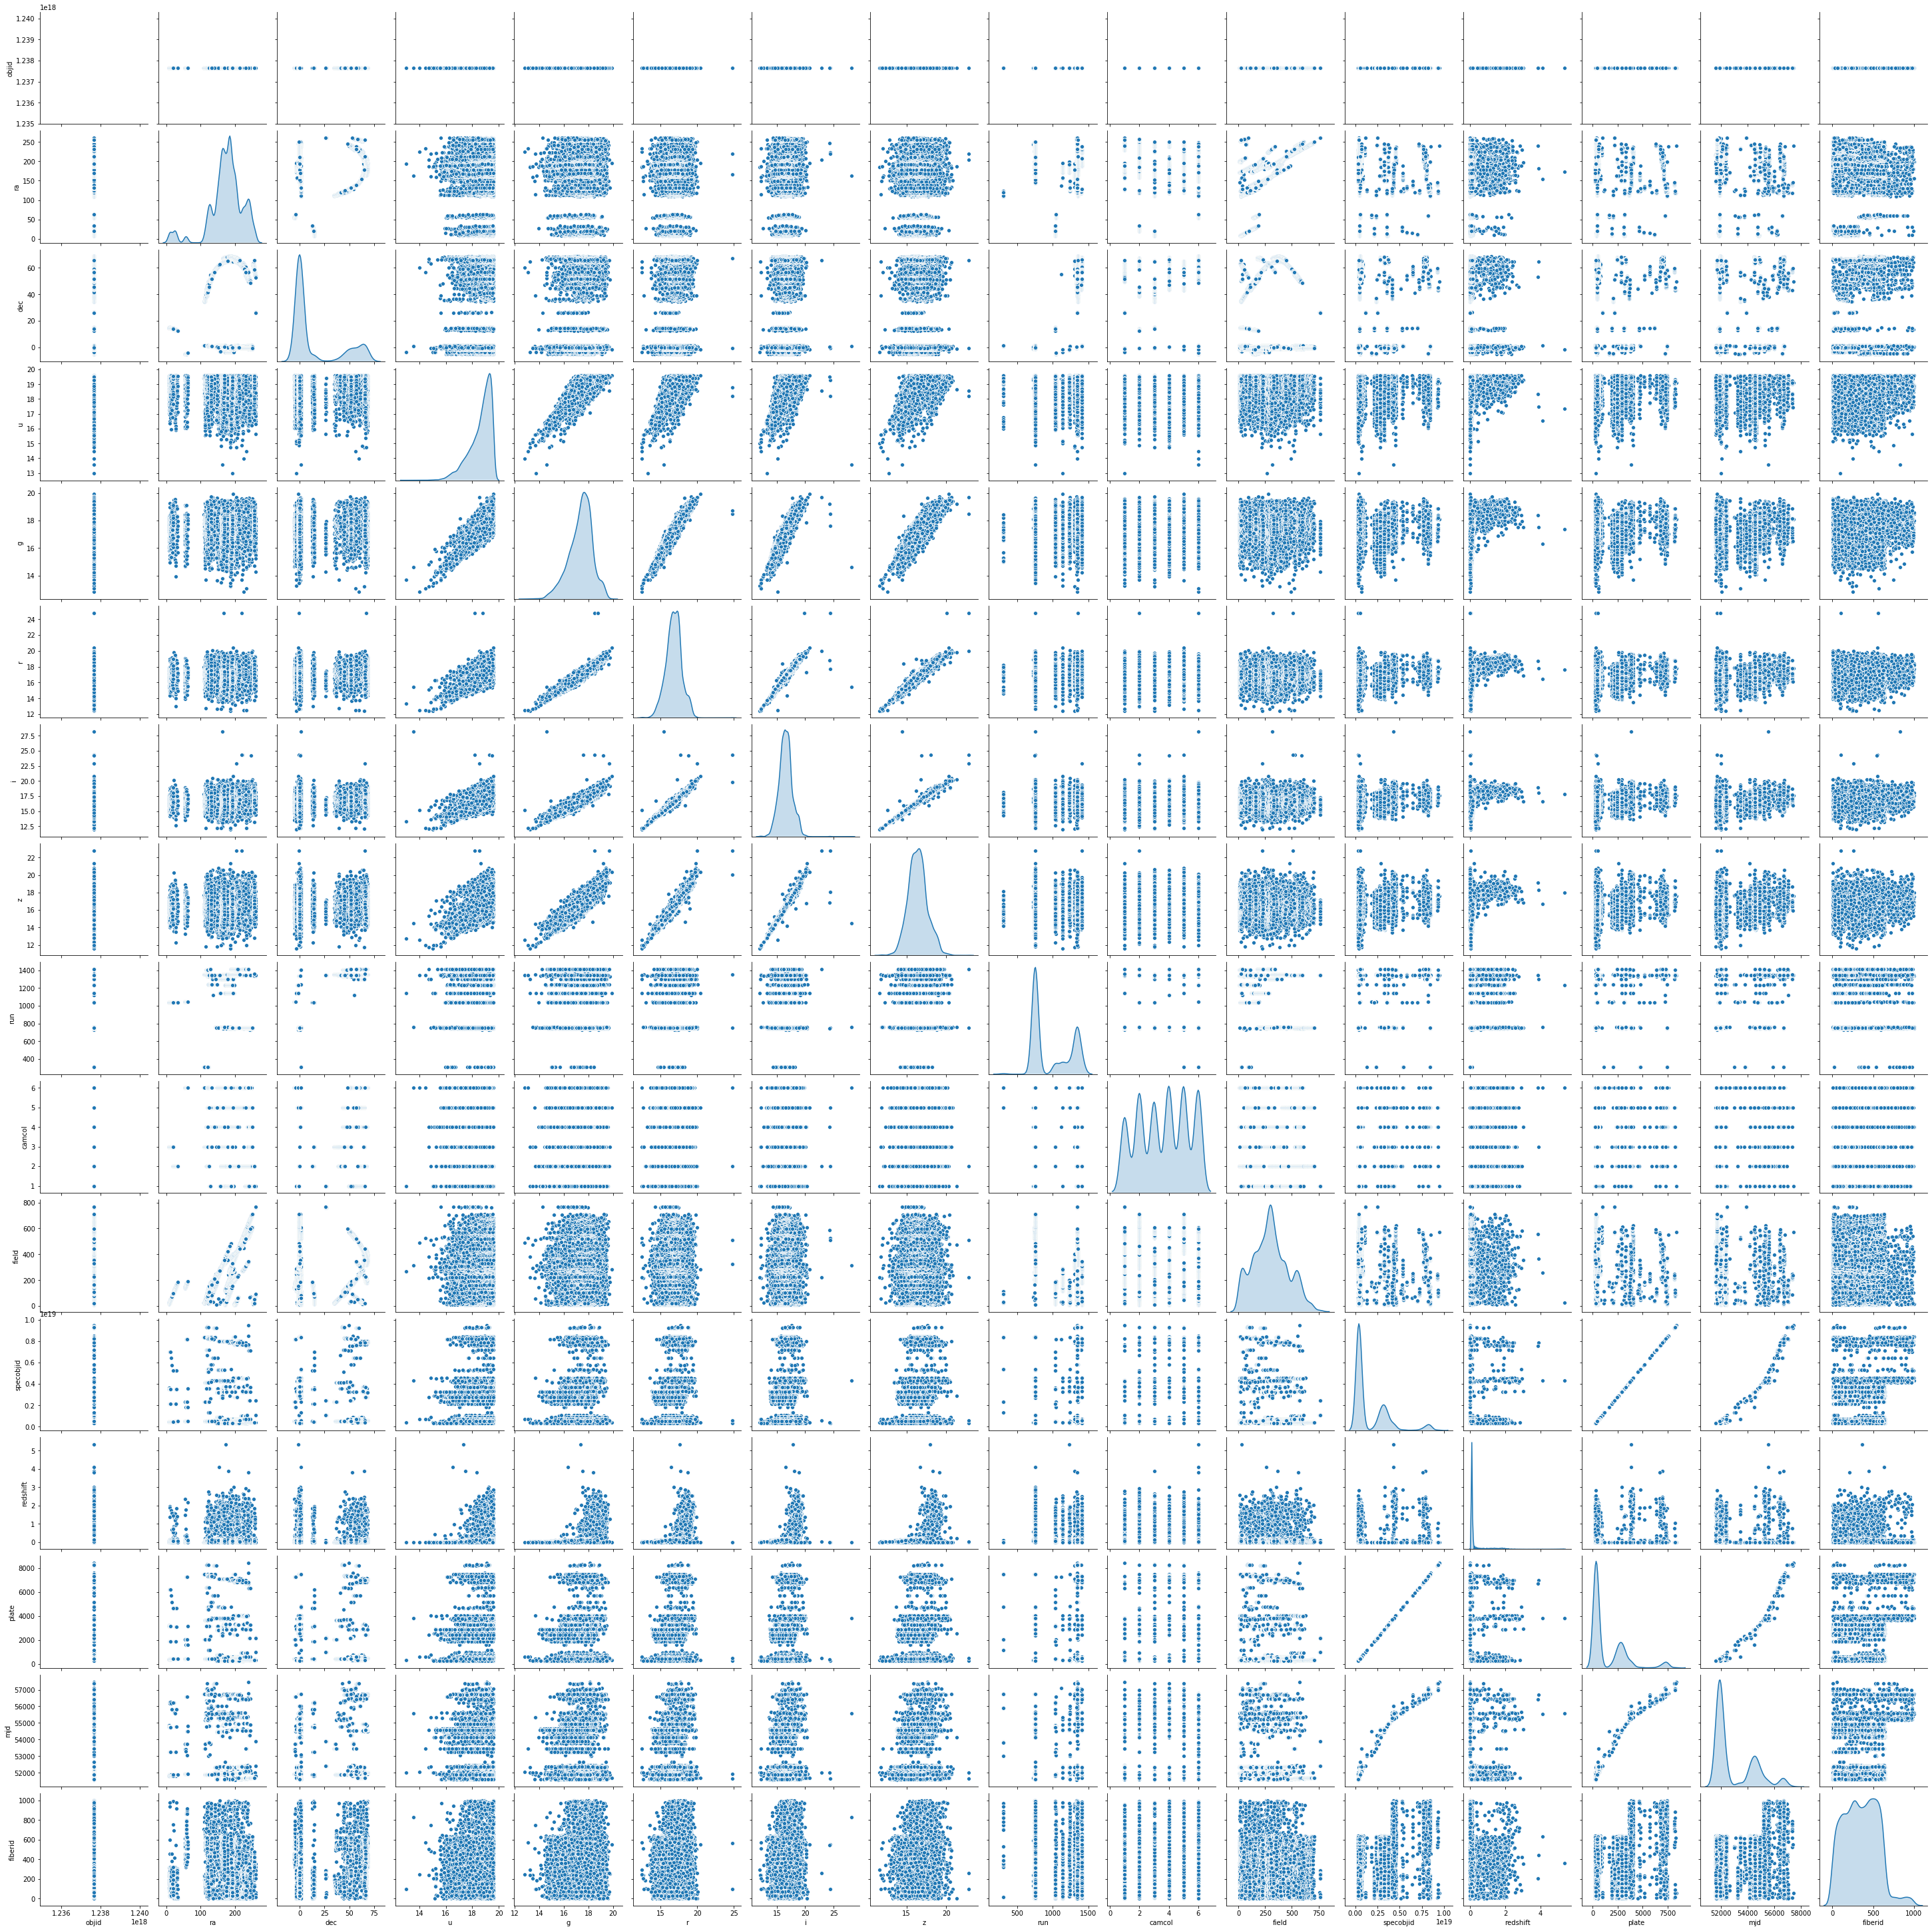

In [83]:
#sns.pairplot(estrellas_num)
import seaborn as sb
sb.pairplot(data_f1_num,diag_kind='kde')

In [85]:
#plt.rcParams["figure.figsize"] = [12,8]
#Z3 = pd.concat([data_f1_num,label],axis=1)                            #incluyendo variable respuesta en la correlación
#sns.heatmap(Z3.corr())

In [86]:
correlation_dat = data_f1_num.corr()
correlation_dat.style.background_gradient(cmap='coolwarm', axis=None)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
ra,0.000000,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,-0.095327,0.030307,-0.095329,-0.086887,0.057485
dec,-0.000000,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.088345,0.067021,0.088342,0.066147,0.155012
u,0.000000,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,-0.129429,0.163741,-0.129430,-0.168793,0.011301
g,0.000000,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,-0.054979,0.407576,-0.054981,-0.092772,0.047187
r,0.000000,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.019788,0.441080,0.019787,-0.009345,0.061081
i,0.000000,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.072960,0.431450,0.072958,0.050896,0.069977
z,-0.000000,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.112398,0.424034,0.112397,0.095658,0.067980
run,-0.000000,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.093604,0.059056,0.093601,0.070354,0.138566
camcol,0.000000,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.040809,0.006834,0.040795,0.026284,0.535629
